Below is an engineering mechanics problem that can be solved with Python. Follow along to see how to solve the problem with code.

## Problem

### Given:

A cantilever beam of total length $a$+$L$+$b$ and loads $P_1$, $P_2$, $P_3$ to $P_n$ at distances $x_1$, $x_2$, $x_3$ to $x_n$.

![cantilever beam](loaded_beam.png)


### Find:

The shear, bending moment and normal stress at any point along the beam

## Solution

### Start the solution: install Python

We are going to use Python to code the solution to the problem. If you don't already have Python installed on your computer, I recommend installing the [Anaconda](https://www.anaconda.com/distribution/) distribution of Python. See [this post](https://pythonforundergradengineers.com/installing-anaconda-on-windows.html) to learn how to install Anaconda on your computer. 

I am coding this solution in a [Jupyter Notebook](https://jupyter.org/). Once you install Anaconda, you can open a Jupyter notebook from the Windows Start Menu or the Anaconda Prompt. See [this post](https://pythonforundergradengineers.com/opening-a-jupyter-notebook-on-windows.html) to learn about 3 ways to open a Jupyter notebook.

Alternatively, instead of using a Jupyter notebook, you could code your solution in a ```.py``` file and use a code editor such as [Visual Studio Code](https://code.visualstudio.com/download) or [Sublime Text](https://www.sublimetext.com/3).

**Alright. Let's get coding....** We will start our solution by asking the user for input.

### Ask the user for input

In the first part of our program, we need to ask the user for input. The user will input the dimensions of the beam, $a$, $L$, and $b$. The user will also enter the point loads $P_1$, $P_2$, ... $P_n$ and the distance between the point loads and the end of the beam $x_1$, $x_2$, ... $x_n$.

We will collect the user's input with Python's ```input()``` function. Note that Python's ```input()``` function outputs a _string_ by default. So we need to convert the user's input from a _string_ into a _float_ (a floating point number or a decimal) before we do any further calculations. The general structure of using ```input()``` is below:

```text
<string_var> = input("What the user sees at the prompt")
```

Where ```"What the user sees at the prompt"``` is the prompt shown to the user when the ```input()``` statement runs. This statement is what the ```input()``` function prints to the user. ```<string_var>``` is a variable to store whatever the user types.  Remember the ```input()``` function outputs a _string_ (a text variable) not a number.

The ```input()``` function can be wrapped with Python's ```float()``` function. The ```float()``` function turns the user's _string_ input into a _float_ (a floating point number or decimal).

Let's try a couple of ```input()``` statements wrapped by ```float()```. When we ask the user for the number of point loads, we'll wrap the ```input("how may points to load")``` with Python's ```int()``` function. The number of point loads must be an integer (can you have half a point load?...), so we will convert the _string_ (the output of the ```input()``` function) to an _integer_ with the ```int()``` function.

In [1]:
import numpy as np
a = float(input("What is length a? "))
L = float(input("What is length L? "))
b = float(input("What is length b? "))
n = int(input("How many point loads? "))

What is length a? 1
What is length L? 4
What is length b? 2
How many point loads? 3


We see four questions. After entering in a number after each question, push the [Enter] key. Now that we have the beam dimensions and number of point loads, we need to ask the user for the magnitude of each point load and distance each point load is applied at compared to the end of the beam.

### Ask the user for the point loads

Next, we need to ask the user for the point loads $P_1$, $P_2$, $P_3$, ... $P_n$ and the corresponding distances $x_1$, $x_2$, $x_3$, ... $x_n$.

We'll collect the point loads and distances with a _for loop_. Our _for loop_ will run the same number of times as the number of point loads ```n``` the user indicated. 

Because we are going to do some computation using the loads and distances the user enters, we will store the user's input in a _NumPy array_ that we'll call ```P```. A NumPy array is a data structure sort of like a Python list. The difference is mathematical operations can be completed on arrays, while mathematical operations on Python lists can be problematic (or require more code than if a NumPy array is used).

Because we know how many loads the user will enter, we also know the size of the array that the loads and distances will be stored in. We will use one row and two columns for each set of load and distance the user inputs. We can use NumPy's ```np.zeros()``` function to create an array of a given size that contains all ```0```'s. As the user enters loads and distances, we will save these values in different rows in the array. Note that we need to pass a tuple in parenthesis to the ```np.zeros()``` function as in ```P = np.zeros((2,4))```. ((There are two sets of parenthesis.))

The general syntax for putting a value in a specific location in a NumPy array is below:

```text
A[row][col] = var
```

Where ```A``` is the array, and ```row``` and ```col``` correspond to the locations in the array where ```var``` will be stored. For example, the code line below will store the value ```9``` in the first row, 2nd column of array ```A```. (Remember Python counting starts at ```0```).

```text
A[0][1] = 9
```

The code below asks the user for loads and distances, saves these in the pre-created array ```P``` and then prints out the load/distance pairs back to the user. We are putting the distances in the first column of the array and the loads in the second column of the array. Later in the program, we'll order the forces acting on the beam by distance. Having the distances in the first column makes this operation a little easier.

In [2]:
P = np.zeros((n,2))
for i in range(n):
    x = float(input(f"what is distance x_{i+1}?"))
    p = float(input(f"what is load P_{i+1}?"))
    P[i][0]=x
    P[i][1]=p
print("The distances and loads you entered are:")
print(P)

what is distance x_1?2
what is load P_1?1
what is distance x_2?4
what is load P_2?2
what is distance x_3?4.5
what is load P_3?5
The distances and loads you entered are:
[[2.  1. ]
 [4.  2. ]
 [4.5 5. ]]


We were asked for three pairs of loads and distances. We can see the loads and distances we entered as rows in the array that is printed out. The next step in solving this mechanics problem is to solve for the reaction forces at point $A$ and point $B$.

## Solve for the reaction forces Ra and Rb

Now that we have all of the distances and all of the applied loads saved into variables, we need to solve for the reaction forces at the supports $A$ and $B$.

### Find reaction force Rb

To find $R_B$, the reaction force at $B$, we will sum the moments about point $A$. Since we are summing the moments about point $A$, the reaction force $R_A$ produces zero moment. Each of the point load moments are are at a distance relative to point $A$ equal to $x-a$ where $a$ is the distance between the end of the beam and the support at point $A$. The equation for the sum of the moments about point $A$ is below.

$$ \sum{M_A} = 0 $$

$$ \sum{M_A} = M_1 + M_2 + M_3 + ... + M_n + M_B = 0 $$

Each individual moment $M_1$, $M_2$, $M_3$ to $M_n$ are due to the point loads $P_1$, $P_2$, $P_3$, $P_n$. Each one of these point loads is at a distance $r = (x - a)$ from point $A$. The equations below show how each moment in the series is calculated.

$$ M_1 = P_1r_1 \ where \ r_1 = x_1 - a$$

$$ M_1 = P_1(x_1 - a) $$

$$ M_n = P_n(x_n - a) $$

Substituting the loads and distances into the sum of moments equation yields the following. Note that we don't know the load at $B$ yet (that's what we are solving for), so that term stays as $M_B$:

$$ \sum{M_A} = P_1(x_1-a) + P_2(x_2-a) + P_3(x_3-a) + ... + P_n(x_n-a) + M_B = 0 $$

Solving for $M_B$ produces:

$$ M_B = - P_1(x_1-a) - P_2(x_2-a) - P_3(x_3-a) - ... - P_n(x_n-a) $$

We can code this into Python using a _for loop_ and array indexing. The point load $P$ is the first column of the array, the distance $x$ is in the second column of the array. Remember that Python counting starts at ```0```, so the first column is column ```0```. 

Reaction force $R_B$ is at a distance $L$ relative to point $A$. Since $M_B = P_br_b$ and $r_b = L$, We can solve for reaction force R_B using:

$$ M_B = P_Br_B $$

$$ M_B = P_BL $$

$$ P_B = \frac{M_B}{L} $$

The code below creates a variable ```Mb``` (the moment due to the reaction force at $B$), then iterates through the point load/distance pairs and calculates the moment due to each pair and assigns it to a variable ```Mi```. In the last line of the _for loop_, ```Mi``` is added to ```Mb```. The ```+=``` operator does _in place_ addition, meaning ```+=``` just adds onto whatever number is already stored in ```Mb```. At the end of the code block, the moment and reaction force are printed to the user using a Python _f-string_.

In [3]:
Mb = 0
for i in range(n):
    pi = P[i][1]
    ri = P[i][0]-a
    Mi = pi*ri
    Mb += Mi
print(f"The momement at due to reaction force at B, M_B = {Mb}")
Rb = Mb/L
print(f"The reaction force at B, R_b = {Rb}")

The momement at due to reaction force at B, M_B = 24.5
The reaction force at B, R_b = 6.125


We see the moment and reaction force at point $B$ is calculated. Next we will calculate the reaction force at point $A$.

### Find reaction force Ra

To find $R_A$, the reaction force at $A$, we will sum the forces in the $y$-direction. All of the point loads $P_1$, $P_2$, P_n$ point down, so they count as negative force, the reaction forces $R_A$ and $R_B$ point up, so they count as positive force.

$$ \sum{F_y} = 0 $$

$$ \sum{M_y} = - P_1 - P_2 - P_3 - ... - P_n + R_A + R_B = 0 $$

$$ R_A = P_1 + P_2 + P_3 + ... + P_n - R_B $$

We can code this into Python using another _for loop_.

In [4]:
Pn = 0
for i in range(n):
    pi = P[i][1]
    Pn += pi
print(f"The sum of the applied point loads is P_n = {Pn}")
Ra = Pn - Rb
print(f"The reaction force at A, R_a = {Ra}")

The sum of the applied point loads is P_n = 8.0
The reaction force at A, R_a = 1.875


The sum of the point loads is displayed as well as the reaction force at $A$. Note how the reaction force at $A$ and the reaction force at $B$ sum to total of the applied point loads.

Now that all of the forces on the beam are known, we can work on the next part of the problem which is calculating the shear along the beam.

## Calculate the shear along the beam

Next we will calculate the shear along the beam. Since all of the loads and support reaction are point loads, the shear along the beam is composed of constant shear segments in between the point loads. We need to calculate the shear in between each applied load or reaction force.

### Sort the distance / load pairs by distance

We will start this process by creating an array that holds the applied point loads and distances as well as the reaction forces and their distance from the end of the beam. We will set all the applied point loads as negative because they point down and all the reaction forces as positive because they point up.

The code block below contains a tricky little line: ```P_sort = P[P[:,0].argsort()]```. Let's break this line down into it's component parts.

```P``` - the array that contains the distances and loads. The distances in the first column, the loads in the second column.

```P[:,0]``` - pull out all rows (```:```), the first column (```0```). This pull out the distances

```P[:,0].argsort()``` - creates an array of the indexes of the distance column from smallest to largest

```P[P[:,0].argsort()]``` - re-order ```P``` based on the array of indexes of distances that was sorted smallest to largest

```P_sort = P[P[:,0].argsort()]``` - save the re-ordered array that is based on distance to a new variable ```P_sort```

The code block also prints out the unsorted array ```P``` and the array sorted by distance ```P_sort```.

In [6]:
P = np.array([[2.,  1. ], [4. , 2. ], [4.5,  5.]])
P[:,1] *= -1      # multiply [all rows, second column] by -1 in place
P = np.append(P,[[a,Ra],[a+L,Rb]], axis=0)
print("The distances and forces acting on the beam are: ")
print(P)
P_sort = P[P[:,0].argsort()] #P[:,0].argsort() produces an array of indicies based on smallest to largest distance
print("Sorted by distance, all of the distances and forces acting on the beam are: ")
print(P_sort)

The distances and forces acting on the beam are: 
[[ 2.    -1.   ]
 [ 4.    -2.   ]
 [ 4.5   -5.   ]
 [ 1.     1.875]
 [ 5.     6.125]]
Sorted by distance, all of the distances and forces acting on the beam are: 
[[ 1.     1.875]
 [ 2.    -1.   ]
 [ 4.    -2.   ]
 [ 4.5   -5.   ]
 [ 5.     6.125]]


We see the array that contains the distances and loads which isn't sorted by distance (the reaction forces $R_B$ and $R_A$, are listed last). Then we see the sorted array that has loads and reaction forces based on distance $x$ from smallest to largest.

### Calculate the internal shear at small intervals along the beam

In [7]:
X = np.linspace(0,a+L+b,100) # create an array of 100 x values from 0 to the length of the beam
V = np.zeros(X.size) # create an array for the shear at each x values, make it the same size as the array of x values
print(X)
print(V)
for i,x in enumerate(X):     #loop through the x values, keep track of the number of times through the loop with enumerate
    v = 0                    # for each x value, start off by assuming 0 shear
    for p in P_sort:         # loop through each load
        if p[0]<x:           # if the x-value of the load is less than the x value we are trying to find the shear at....
            v-=p[1]          # shear counteracts the loads, so we subtract each load from the shear  
    V[i]=v                   # add the shear to the array of shear values
print(V)

[0.         0.07070707 0.14141414 0.21212121 0.28282828 0.35353535
 0.42424242 0.49494949 0.56565657 0.63636364 0.70707071 0.77777778
 0.84848485 0.91919192 0.98989899 1.06060606 1.13131313 1.2020202
 1.27272727 1.34343434 1.41414141 1.48484848 1.55555556 1.62626263
 1.6969697  1.76767677 1.83838384 1.90909091 1.97979798 2.05050505
 2.12121212 2.19191919 2.26262626 2.33333333 2.4040404  2.47474747
 2.54545455 2.61616162 2.68686869 2.75757576 2.82828283 2.8989899
 2.96969697 3.04040404 3.11111111 3.18181818 3.25252525 3.32323232
 3.39393939 3.46464646 3.53535354 3.60606061 3.67676768 3.74747475
 3.81818182 3.88888889 3.95959596 4.03030303 4.1010101  4.17171717
 4.24242424 4.31313131 4.38383838 4.45454545 4.52525253 4.5959596
 4.66666667 4.73737374 4.80808081 4.87878788 4.94949495 5.02020202
 5.09090909 5.16161616 5.23232323 5.3030303  5.37373737 5.44444444
 5.51515152 5.58585859 5.65656566 5.72727273 5.7979798  5.86868687
 5.93939394 6.01010101 6.08080808 6.15151515 6.22222222 6.2929292

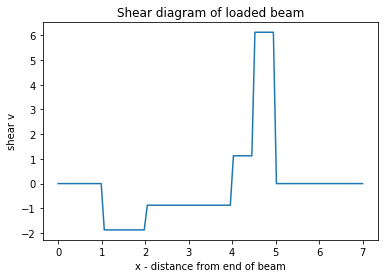

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(X,V)
plt.xlabel("x - distance from end of beam")
plt.ylabel("shear v")
plt.title("Shear diagram of loaded beam")
plt.show()

In [9]:
M = np.zeros(X.size) # create an array for the shear at each x values, make it the same size as the array of x values
print(X)
print(M)
for i,x in enumerate(X):     #loop through the x values, keep track of the number of times through the loop with enumerate
    m = 0                    # for each x value, start off by assuming 0 moment
    for p in P_sort:         # loop through each load
        if p[0]<x:           # if the x-value of the load is less than the x value we are trying to find the moment at
            m += p[1]*(x-p[0])   # moment = F*r = load * (x - load distance)  
    M[i]=m                   # add the moment to the array of moment values
print(M)

[0.         0.07070707 0.14141414 0.21212121 0.28282828 0.35353535
 0.42424242 0.49494949 0.56565657 0.63636364 0.70707071 0.77777778
 0.84848485 0.91919192 0.98989899 1.06060606 1.13131313 1.2020202
 1.27272727 1.34343434 1.41414141 1.48484848 1.55555556 1.62626263
 1.6969697  1.76767677 1.83838384 1.90909091 1.97979798 2.05050505
 2.12121212 2.19191919 2.26262626 2.33333333 2.4040404  2.47474747
 2.54545455 2.61616162 2.68686869 2.75757576 2.82828283 2.8989899
 2.96969697 3.04040404 3.11111111 3.18181818 3.25252525 3.32323232
 3.39393939 3.46464646 3.53535354 3.60606061 3.67676768 3.74747475
 3.81818182 3.88888889 3.95959596 4.03030303 4.1010101  4.17171717
 4.24242424 4.31313131 4.38383838 4.45454545 4.52525253 4.5959596
 4.66666667 4.73737374 4.80808081 4.87878788 4.94949495 5.02020202
 5.09090909 5.16161616 5.23232323 5.3030303  5.37373737 5.44444444
 5.51515152 5.58585859 5.65656566 5.72727273 5.7979798  5.86868687
 5.93939394 6.01010101 6.08080808 6.15151515 6.22222222 6.2929292

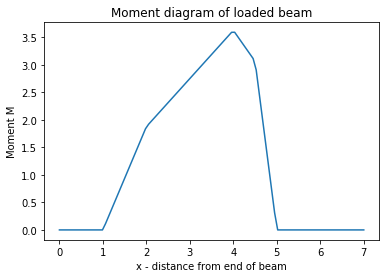

In [10]:
plt.plot(X,M)
plt.xlabel("x - distance from end of beam")
plt.ylabel("Moment M")
plt.title("Moment diagram of loaded beam")
plt.show()

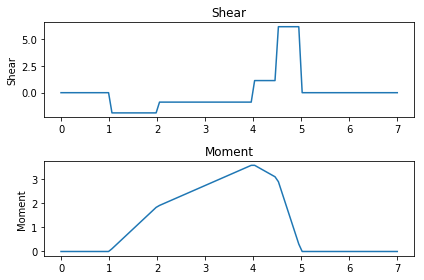

In [11]:
fig, (ax1, ax2) = plt.subplots(nrows=2,ncols=1)
ax1.plot(X,V)
ax1.set_ylabel("Shear")
ax1.set_title("Shear")
ax2.plot(X,M)
ax2.set_ylabel("Moment")
ax2.set_title("Moment")
plt.tight_layout()
plt.show()